In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import  cv2

In [3]:
train_dir='train_dir'
test_dir='test_dir'
validation_dir='validation_dir'

rock_dir='train_dir/rock'
scissors_dir='train_dir/scissors'
paper_dir='train_dir/paper'

#show sample images




rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


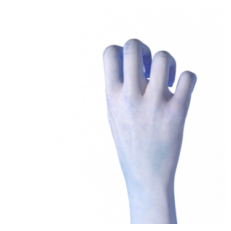

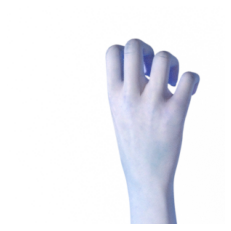

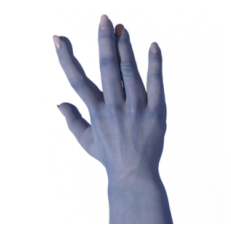

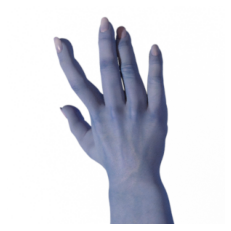

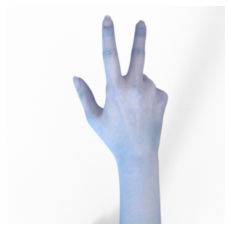

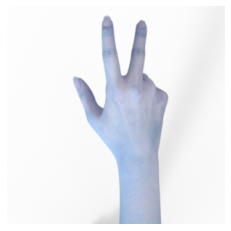

In [4]:
pic_index = 12

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = cv2.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  
  

In [8]:
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
	   rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)




#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import VGG16

model_base=VGG16(include_top=False,
                      weights='imagenet',
                      input_shape=(150,150,3))


#model_base=InceptionV3(include_top=False,
                      #weights='imagenet',
                      #input_shape=(150,150,3))

for layer in model_base.layers:
  layer.trainable=False
  
model_base.summary()
#freezing certain parts of the model

#set_trainable=False
#for layer in inc_model:
    #if layer.name=='' :
       #set_trainable=True 
    #if set_trainable:
       #layer_trainable=True
    #else:
       #layer_trainable = False
#last_layer=model.get_layer('mixed9_1')
last_output=model_base.output
model=Sequential()
model.add(model_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['acc'])
#callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='min', verbose=1, patience=10,baseline=0.97)
history = model.fit(train_generator, epochs=10, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=5
                   )

Found 2520 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________

In [10]:
score = np.array(history.history['acc']).mean()*100
print("Accuracy of the model is",score)
#model.save("rps.h5")

Accuracy of the model is 95.23556113243103
